# Aufgabe 25

## a)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import csv 
from scipy.sparse import diags
from scipy.stats import sem

### Definiere Polynom:
\begin{equation}
    p(x)=a \cdot x^6+b \cdot x^5+c \cdot x^4+d \cdot x^3+e \cdot x^2+f \cdot x+g 
\end{equation}

In [40]:
def polynom6(x, a, b, c, d, e, f, g):
     return a*x**6+b*x**5+c*x**4+d*x**3+e*x**2+f*x+g

### Definiere Designmatrix
\begin{equation}
A=
    \begin{pmatrix}
        f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) \\
        f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_1)\\
        f_1(x_3) & f_2(x_3) & f_3(x_3) & f_4(x_3) & f_5(x_3) & f_6(x_3) & f_7(x_1)\\
        f_1(x_4) & f_2(x_4) & f_3(x_4) & f_4(x_4) & f_5(x_4) & f_6(x_4) & f_7(x_1)\\
        f_1(x_5) & f_2(x_5) & f_3(x_5) & f_4(x_5) & f_5(x_5) & f_6(x_5) & f_7(x_1)\\
        f_1(x_6) & f_2(x_6) & f_3(x_6) & f_4(x_6) & f_5(x_6) & f_6(x_6) & f_7(x_1)\\
        f_1(x_7) & f_2(x_7) & f_3(x_7) & f_4(x_7) & f_5(x_7) & f_6(x_7) & f_7(x_1)\\
        f_1(x_8) & f_2(x_8) & f_3(x_8) & f_4(x_8) & f_5(x_8) & f_6(x_8) & f_7(x_1)
    \end{pmatrix}
\end{equation}

In [41]:
def MatrixA(x):
    f1 = np.ones(len(x))
    f2 = f1*x
    f3 = f2*x
    f4 = f3*x
    f5 = f4*x
    f6 = f5*x
    f7 = f6*x
    A = np.vstack((f1,f2,f3,f4,f5,f6,f7)).T
    return np.asmatrix(A)

mit $f_1(x) = 1$,  $f_2(x) = x $, $f_3(x) = x^2$, $f_4(x) = x^3 $, $f_5(x) = x^4$, $f_6(x) = x^5 $ und $f_7(x) = x^6 $

In [42]:
def exceldata(filename, y_rows, Sig):
    x = []
    y = []
    with open(filename) as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(row[0])
            if y_rows > 1:
                y.append(row[1:y_rows+1])
            else:
                y.append(row[1])
    #Erste Zeilen löschen
    x = np.delete(x,(0), axis=0)
    y = np.delete(y,(0), axis=0)
    
    # Arrays erzeugen (ich werde das ziemlich oft benutzen, sorry schonmal)
    x = np.asarray(x)
    y = np.asarray(y)
    
    # Sollen floats sein (zum rechnen, sonst kommen irgendwelche dtype-Fehler)
    x = x.astype(np.float)
    y = y.astype(np.float)
    
    if Sig == True:
        sigma = np.zeros(len(x))
        newy = np.zeros(len(x))
        for i in range(0,y.shape[0]):
            newy[i] = np.mean(y[i])
            sigma[i] = sem(y[i])
        return x, newy, sigma
    else:
        return x, y

In [43]:
x, y =exceldata(filename = 'aufg_a.csv', y_rows=1, Sig=False)
A=MatrixA(x)
ymatrix = np.asmatrix(y)
a = (A.T*A)**(-1)*A.T*ymatrix.T
a
#a_array=np.asarray(a)

matrix([[-6.74453241e-02],
        [ 6.09609032e-01],
        [-5.13748208e-01],
        [ 2.10566519e-01],
        [-4.52007747e-02],
        [ 4.78568044e-03],
        [-1.96288194e-04]])

Text(0,0.5,'y')

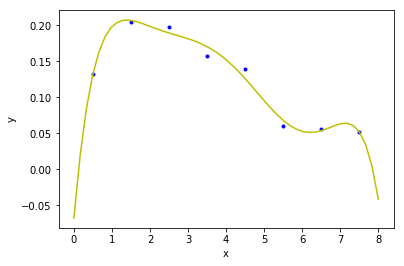

In [44]:
z=np.linspace(0, 8)
plt.plot(x, y, 'b.')
a_Array=np.asarray(a)
p=polynom6(z, a_Array[6], a_Array[5], a_Array[4], a_Array[3], a_Array[2], a_Array[1], a_Array[0])
plt.plot(z, p, 'y-')
plt.xlabel('x')
plt.ylabel('y')

## b)

[[-1.  1.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.]]


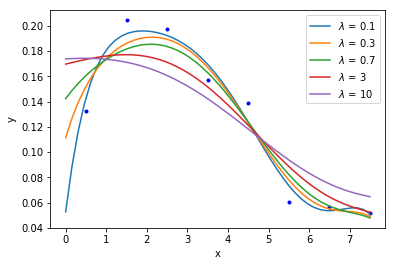

In [45]:
C = diags([1, -2, 1], [-1, 0, 1], shape=(8, 8)).toarray()
C[0][0] = C[7][7] = -1
C2=np.asmatrix(C)
print(C2)
xx = np.linspace(0,7.5)
plt.plot(x, y, 'b.')
for lamb in [0.1,0.3,0.7,3,10]:
    a = ((((A.T*A) + lamb*np.dot(np.dot(C, A).T, np.dot(C, A))).I)*A.T)*ymatrix.T
    a2=np.asarray(a)
    plt.plot(xx, polynom6(xx,a2[6], a2[5], a2[4], a2[3], a2[2], a2[1], a2[0]), label=r'$\lambda$ = {}'.format(lamb))

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## c)

In [48]:
x, y, sigma = exceldata(filename='aufg_c.csv', y_rows=50, Sig=True)
ymatrix=np.asmatrix(y)
W = np.diag(1/sigma**2*np.ones(len(x))) 
a = ((A.T*W*A).I *A.T*W) * ymatrix.T
print(a)

[[ 1.03975572e-01]
 [ 1.92955217e-02]
 [ 6.17000882e-02]
 [-3.75650751e-02]
 [ 7.91884456e-03]
 [-7.34894317e-04]
 [ 2.56958584e-05]]


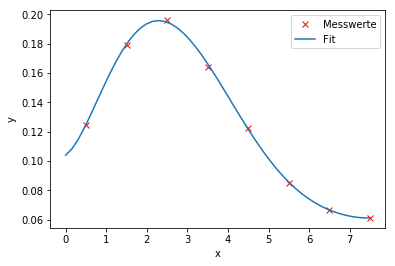

In [49]:
a=np.asarray(a)
plt.plot(x, y, 'rx', label='Messwerte')
plt.plot(xx, polynom6(xx, a[6], a[5], a[4], a[3], a[2], a[1], a[0]), label='Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()